In [14]:
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import streamlit as st
import os
import csv
from sklearn.datasets import make_regression
from sklearn.datasets import load_iris
from sklearn.datasets import load_wine
from sklearn.datasets import load_boston
from sklearn.datasets import load_diabetes
from sklearn.datasets import load_digits
from sklearn.datasets import make_regression
from sklearn.datasets import 

In [15]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['Flower'] = iris.target
df['Flower'] = df['Flower'].apply(lambda x: iris.target_names[x])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Flower
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [17]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=.33, random_state=1)

In [18]:
svc = SVC(kernel='rbf', C=30, gamma='auto')
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.98

In [19]:
cross_val_score(SVC(kernel='rbf', C=30, gamma='auto'), X_train, y_train)

array([1.  , 0.9 , 0.95, 0.95, 0.9 ])

In [20]:
cross_val_score(SVC(kernel='linear', C=40, gamma='auto'), X_train, y_train)

array([1.  , 0.9 , 0.95, 0.95, 0.85])

In [21]:
kernels = ['rbf', 'linear']
c_val = [10,20,30]
result = {}
for k in kernels:
    for c in c_val:
        result[str(k)+'_'+str(c)] = np.average(cross_val_score(SVC(kernel='rbf', C=40, gamma='auto'), X_train, y_train, cv=5))
        
result

{'rbf_10': 0.9400000000000001,
 'rbf_20': 0.9400000000000001,
 'rbf_30': 0.9400000000000001,
 'linear_10': 0.9400000000000001,
 'linear_20': 0.9400000000000001,
 'linear_30': 0.9400000000000001}

In [22]:
clf = GridSearchCV(SVC(gamma='auto'), 
                   {
                       'kernel':['rbf', 'linear'],
                       'C':[10,20,30]
                   },
                   cv=5,
                   return_train_score=False
                  )

clf.fit(X_train, y_train)
clf.cv_results_

{'mean_fit_time': array([0.0006012 , 0.00080228, 0.00099907, 0.00119605, 0.00059962,
        0.00040007]),
 'std_fit_time': array([4.90882620e-04, 7.48602554e-04, 1.16410786e-06, 7.40815805e-04,
        4.89589937e-04, 4.90034948e-04]),
 'mean_score_time': array([0.00039983, 0.00059686, 0.00040021, 0.00020242, 0.00039968,
        0.00059948]),
 'std_score_time': array([0.00048969, 0.00048736, 0.00049016, 0.00040483, 0.00048951,
        0.00048947]),
 'param_C': masked_array(data=[10, 10, 20, 20, 30, 30],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 10, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 20, 'kernel': 'rbf'},
  {'C': 20, 'kernel': 'linear'},
  {'C': 30, 'kernel': 'rbf'},
  {'C'

In [23]:
rscv = RandomizedSearchCV(SVC(gamma='auto'), 
                          {
                              'kernel':['rbf', 'linear'],
                              'C':[10,20,30]
                          },
                          cv = 5,
                          return_train_score = False,
                          n_iter = 4
                         )
rscv.fit(X_train, y_train)
rscv.cv_results_

{'mean_fit_time': array([0.0009974 , 0.00079904, 0.0005981 , 0.00059943]),
 'std_fit_time': array([4.46956946e-06, 3.99518081e-04, 4.88357720e-04, 4.89436177e-04]),
 'mean_score_time': array([0.00040193, 0.0001997 , 0.00059795, 0.00040202]),
 'std_score_time': array([0.00049227, 0.0003994 , 0.00048824, 0.00049239]),
 'param_kernel': masked_array(data=['linear', 'linear', 'rbf', 'linear'],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_C': masked_array(data=[10, 20, 30, 30],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'kernel': 'linear', 'C': 10},
  {'kernel': 'linear', 'C': 20},
  {'kernel': 'rbf', 'C': 30},
  {'kernel': 'linear', 'C': 30}],
 'split0_test_score': array([1., 1., 1., 1.]),
 'split1_test_score': array([0.95, 0.9 , 0.9 , 0.95]),
 'split2_test_score': array([0.95, 0.95, 0.95, 0.95]),
 'split3_test_score': array([1.  , 1.  , 0.95, 0.95]),
 'spli

In [25]:
pd.DataFrame(clf.cv_results_)[['param_kernel', 'param_C', 'mean_test_score']]

,param_kernel,param_C,mean_test_score
0,rbf,10,0.96
1,linear,10,0.94
2,rbf,20,0.95
3,linear,20,0.94
4,rbf,30,0.94
5,linear,30,0.94


In [27]:
pd.DataFrame(rscv.cv_results_)[['param_kernel', 'param_C', 'mean_test_score']]

,param_kernel,param_C,mean_test_score
0,linear,10,0.94
1,linear,20,0.94
2,rbf,30,0.94
3,linear,30,0.94


In [28]:
X, y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=40, random_state=13)

In [30]:
reg = LinearRegression()
reg.fit(X, y)
reg.intercept_, reg.coef_

(-4.589489117353961, array([28.04787357]))

In [46]:
class myRegression():
    def __init__(self):
        self.m, self.b, self.lr, self.y_final, self.temp, self.e, self.len = 0,0,0,0,0,0,0
        pass
    def fit(self,x,y,lr=.01):
        self.m = np.ones(x.shape[1])
        self.lr = lr
        self.len = len(y)
        while True:
            self.temp = self.b
            self.e += 1
            self.y_final = y - self.predict(x)
            self.b -= self.lr*-2*sum(self.y_final)/self.len
            self.m -= self.lr*-2*np.dot(self.y_final, x)/self.len
            if(round(self.b,10)==round(self.temp,10)):break
        pass
    def predict(self,x):
        return np.dot(x,self.m)+self.b
        pass

In [47]:
ct = myRegression()
ct.fit(X,y)
ct.e, ct.b, ct.m

(1248, -4.589489112346061, array([28.04787355]))

In [48]:
reg.intercept_, reg.coef_

(-4.589489117353961, array([28.04787357]))

In [1]:
import pandas as pd
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import streamlit as st
import os
import csv
from collections import Counter
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_iris
from sklearn.datasets import load_boston
from sklearn.datasets import load_wine
from sklearn.datasets import load_digits
from sklearn.datasets import load_diabetes
from sklearn.datasets import load_files
from sklearn.datasets import *
from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import *
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import *
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.metrics import rand_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import *
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsTransformer
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from collections import Counter


In [23]:
X,y = make_regression(n_samples=1000, n_features=10, n_informative=1, n_targets=1, noise=30, random_state=13)

In [24]:
reg = LinearRegression()
reg.fit(X,y)
reg.score(X,y)

0.28279995204695374

ValueError: x and y must be the same size

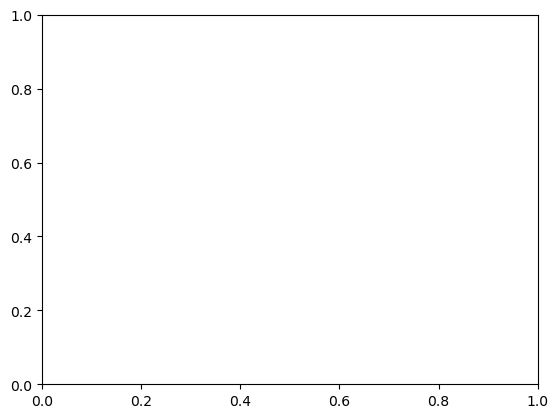

In [25]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X), color='r')

In [26]:
reg.intercept_, reg.coef_

(1.4344264798894066,
 array([19.13649827, -1.14662737, -0.14569733,  0.36103436, -0.85497355,
         0.84354469,  1.00503748,  0.22057973,  0.84362351,  0.29262169]))

In [27]:
class ctRegression():
    def __init__(self):
        self.m, self.b, self.lr, self.y_final, self.temp, self.len, self.e = 0,0,0,0,0,0,0
        pass
    def fit(self,x,y,lr=.01):
        self.m = np.ones(x.shape[1])
        self.lr = lr
        self.len = len(x)
        while True:
            self.temp = self.b
            self.e += 1
            self.y_final = y - self.predict(x)
            self.b -= self.lr*-2*sum(self.y_final)/self.len
            self.m -= self.lr*-2*np.dot(self.y_final,x)/self.len
            if(round(self.b,10)==round(self.temp,10)): break
        pass
    def predict(self,x):
        return np.dot(x,self.m)+self.b
        pass

In [28]:
ct = ctRegression()
ct.fit(X,y)
ct.e, ct.b, ct.m

(1122,
 1.434426474842985,
 array([19.13649823, -1.14662737, -0.14569731,  0.36103438, -0.85497355,
         0.84354467,  1.00503751,  0.22057974,  0.84362351,  0.29262168]))

In [29]:
reg.intercept_, reg.coef_

(1.4344264798894066,
 array([19.13649827, -1.14662737, -0.14569733,  0.36103436, -0.85497355,
         0.84354469,  1.00503748,  0.22057973,  0.84362351,  0.29262169]))

In [34]:
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import streamlit as st
import os
import csv
import array
from sklearn.datasets import make_regression
from sklearn.datasets import load_iris
from sklearn.datasets import load_wine
from sklearn.datasets import load_boston
from sklearn.datasets import load_digits 
from sklearn.datasets import load_files
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import *
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import *
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.metrics import rand_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsTransformer
from sklearn.cluster import KMeans